## Задача 2: аппроксимация функции
Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)


Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

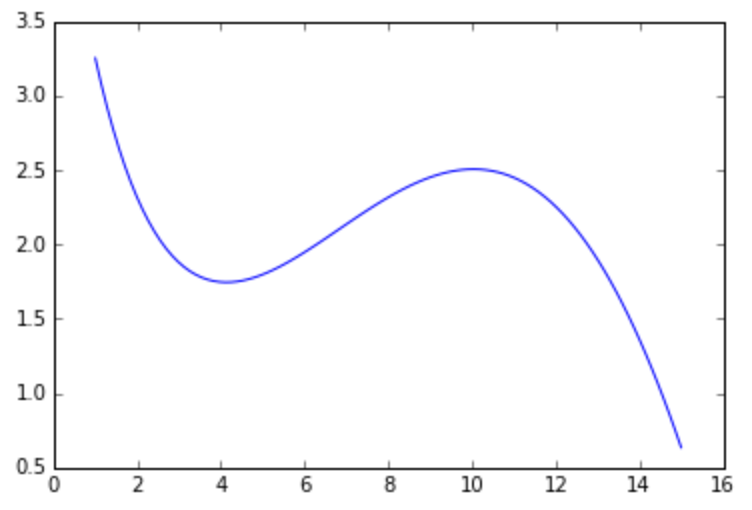



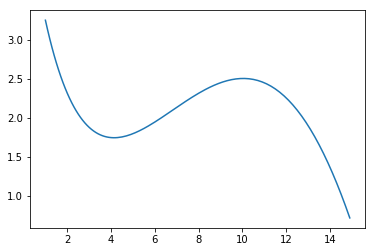

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import linalg

def f(x):
    return np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0)

xlist = np.arange(1, 15, 0.1)
plt.plot(xlist, [f(x) for x in xlist] )
plt.show()



Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

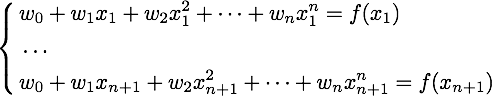

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.  


Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

* Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

[[1, 1], [1, 15]]
[[3.2522168652714192], [0.63522141957866562]]
[[ 3.43914511]
 [-0.18692825]]


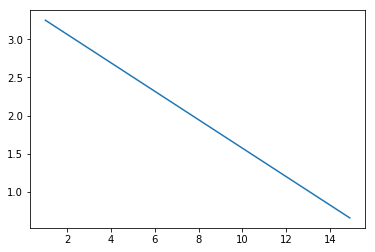

In [78]:
A1 = [[1, 1], [1, 15]]
B1 = [[f(1)], [f(15)]  ]

x1 = linalg.solve(A1, B1)

print A1
print B1
print x1 

def f1(x):
    return x1[0] + x1[1] * x

plt.plot(xlist, [f1(x) for x in xlist] )
plt.show()    

* Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

[[1, 1, 1], [1, 8, 64], [1, 15, 225]]
[[3.2522168652714192], [2.316170159053224], [0.63522141957866562]]
[[ 3.32512949]
 [-0.06531159]
 [-0.00760104]]


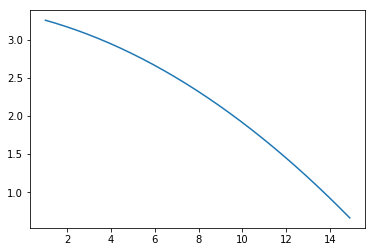

In [79]:
A2 = [[1, 1, 1], [1, 8, 8**2], [1, 15, 15**2]]
B2 = [[f(1)], [f(8)], [f(15)]  ]

x2 = linalg.solve(A2, B2)

print A2
print B2
print x2 

def f2(x):
    return x2[0] + x2[1] * x + x2[2] * x**2

plt.plot(xlist, [f2(x) for x in xlist] )
plt.show()  

* Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

[[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 225, 3375]]
[[3.2522168652714192], [1.7468459495903677], [2.5054164070002463], [0.63522141957866562]]
[[ 4.36264154]
 [-1.29552587]
 [ 0.19333685]
 [-0.00823565]]


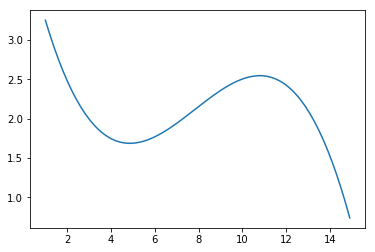

In [83]:
A3 = [[1, 1, 1, 1], [1, 4, 4**2, 4**3], [1, 10, 10**2, 10**3], [1, 15, 15**2, 15**3]]
B3 = [[f(1)], [f(4)], [f(10)], [f(15)]  ]

x3 = linalg.solve(A3, B3)

print A3
print B3
print x3 

def f3(x):
    return x3[0] + x3[1] * x + x3[2] * x**2 + x3[3] * x**3

plt.plot(xlist, [f3(x) for x in xlist] )
plt.show() 

* Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [91]:
file_obj = open('submission-2.txt', 'w')
string = ""

for i in range (len(x3)):
    n = (x3[i, 0])
    string = string + str(n) + " "

file_obj.write(string)
file_obj.close()

In [92]:
! more "submission-2.txt"

4.36264153512 -1.29552586569 0.193336847022 -0.00823565117332 
